# Setup & imports

In [31]:
!curl -L https://github.com/MTG/SymbTr/archive/refs/tags/v2.4.3.tar.gz --output /content/v2.4.3.tar.gz
!tar -xf /content/v2.4.3.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19.6M    0 19.6M    0     0  3504k      0 --:--:--  0:00:05 --:--:-- 4078k


In [32]:
# Counting the number of elements in this subfolder -> We have 2201 txt file containing notes.
!ls -lh /content/SymbTr-2.4.3/txt/ | wc -l


2201


In [33]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import importlib.util
import os

# Analysis - Histogram for a single score

We want :
* The name of the makam of the track
  * First elem of the name of the file
* The interval histogram for this score
  * To be computed

Cf paper :

intervals = {'Whole Tone Descending': -9, 'Unison': 0, 'Apotome Descending': -5, 'Whole Tone': 9, 'Apotome': 5, 'Limma Descending': -4, 'Minor Whole Tone Descending': -8, 'Limma': 4, 'Minor Whole Tone': 8, 'Augmented Second': 13, 'Augmented Second Descending': -12, 'Augmented Second Descending1': -13, 'Perfect Fourth': 22}

In [34]:
!cat /content/SymbTr-2.4.3/txt/acem--ilahi--duyek--aldanma_dunya--zekai_dede.txt

Sira	Kod	Nota53	NotaAE	Koma53	KomaAE	Pay	Payda	Ms	LNS	Bas	Soz1	Offset
1	51			0	0	8	8	0	17	0	Düyek	0.0
2	9	Do5	C5	318	318	1	4	714	95	96	Al	0.25
3	9	Fa5	F5	340	340	3	16	536	99	96	dan	0.4375
4	9	Mi5	E5	336	336	1	16	179	95	96		0.5
5	9	Sol5	G5	349	349	1	16	179	99	96	ma 	0.5625
6	9	Fa5	F5	340	340	1	16	179	99	96		0.625
7	9	Fa5	F5	340	340	1	16	179	99	96		0.6875
8	9	Mi5	E5	336	336	1	16	179	99	96		0.75
9	9	Fa5	F5	340	340	1	4	714	100	96		1.0
10	9	Fa5	F5	340	340	1	8	357	95	96		1.125
11	9	Mi5	E5	336	336	1	16	179	99	96	dün	1.1875
12	9	Fa5	F5	340	340	1	16	179	99	96		1.25
13	9	Mi5	E5	336	336	1	8	357	99	96		1.375
14	9	Re5	D5	327	327	1	8	357	99	96		1.5
15	9	Mi5	E5	336	336	1	16	179	99	96		1.5625
16	9	Fa5	F5	340	340	1	16	179	99	96		1.625
17	9	Mi5	E5	336	336	1	16	179	99	96		1.6875
18	9	Re5	D5	327	327	1	16	179	99	96		1.75
19	9	Do5	C5	318	318	1	4	714	95	96		2.0
20	9	Re5	D5	327	327	1	8	357	99	96	ya 	2.125
21	9	Mi5	E5	336	336	1	8	357	99	96		2.25
22	9	Fa5	F5	340	340	1	8	357	99	96		2.375
23	9	Sol5	G5	349	349	1	8

In [35]:
# Pandarize shit
head = ['Sira', 'Kod', 'Nota53', 'NotaAE', 'Koma53', 'KomaAE', 'Pay', 'Payda', 'Ms', 'LNS', 'Bas', 'Soz1', 'Offset']  
data = pd.read_csv('/content/SymbTr-2.4.3/txt/acem--ilahi--duyek--aldanma_dunya--zekai_dede.txt', sep = '\t')
data.columns = head
print(data)
print(data['Koma53'][:])

     Sira  Kod Nota53 NotaAE  Koma53  KomaAE  Pay  Payda   Ms  LNS  Bas  \
0       1   51    NaN    NaN       0       0    8      8    0   17    0   
1       2    9    Do5     C5     318     318    1      4  714   95   96   
2       3    9    Fa5     F5     340     340    3     16  536   99   96   
3       4    9    Mi5     E5     336     336    1     16  179   95   96   
4       5    9   Sol5     G5     349     349    1     16  179   99   96   
..    ...  ...    ...    ...     ...     ...  ...    ...  ...  ...  ...   
270   271    9    Do5     C5     318     318    1     32   89   99   96   
271   272    9  Si4b2   B4b1     312     313    1     16  179   99   96   
272   273    9    La4     A4     305     305    1     16  179   99   96   
273   274    9    La4     A4     305     305    1      4  714   95   96   
274   275    9     Es     Es      -1      -1    1      4  714  100    0   

      Soz1   Offset  
0    Düyek   0.0000  
1       Al   0.2500  
2      dan   0.4375  
3      NaN 

Text(0, 0.5, 'Pourcentage')

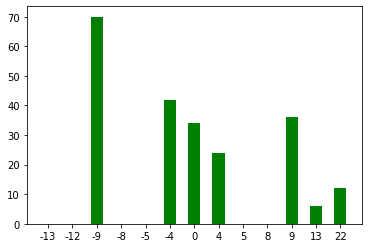

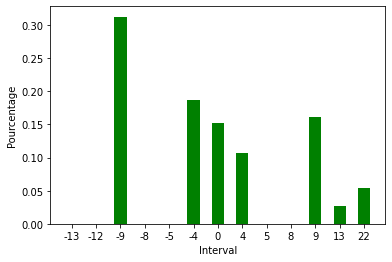

In [36]:
# Prepping the function
head = ['Sira', 'Kod', 'Nota53', 'NotaAE', 'Koma53', 'KomaAE', 'Pay', 'Payda', 'Ms', 'LNS', 'Bas', 'Soz1', 'Offset']  
 
def make_histogram(filename):
  list_ = []
  j = 0
  i = 0
  #print(filename)
  try:
    del dico
  except : 
    pass
  dico = {'-13': 0, '-12': 0, '-9': 0, '-8': 0, '-5': 0, '-4': 0, '0': 0, '4': 0, '5': 0, '8': 0, '9': 0, '13': 0, '22': 0}
  #print(dico)
  data = pd.read_csv(filename, sep = '\t')
  data.columns = head
  for j in data['Koma53'][:]:
    if j != '-1':
      list_.append(j)

  for i in range(len(list_)):
    if(i+1 < len(list_)):
      if(list_[i] == -1 or list_[i+1 == -1]):
        pass
      else:
        val = list_[i+1] - list_[i]
        if abs(val < 300):

          if str(val) in dico.keys():
            dico[str(val)] += 1
  #print(dico)
  return(dico)
  
test = make_histogram('/content/SymbTr-2.4.3/txt/acem--ilahi--duyek--aldanma_dunya--zekai_dede.txt')


plt.figure()
plt.bar(test.keys(), test.values(), width=0.5, color='g') 

tmp_l = []
for i in test.values():
  tmp_l.append(i/np.sum(list(test.values())))

plt.figure()
plt.bar(test.keys(), tmp_l, width=0.5, color='g')
plt.xlabel('Interval')
plt.ylabel('Pourcentage')

# Analysis - Histogram for the whole dataset

In [37]:
!find /content/SymbTr-2.4.3/txt/ -name '*.txt' >  /content/pathlist.csv

In [38]:
!wc -l /content/pathlist.csv

2200 /content/pathlist.csv


In [39]:
!head /content/pathlist.csv

/content/SymbTr-2.4.3/txt/hicaz--sarki--kapali_curcuna--anlatilmaz_bin--erdogan_yildizel.txt
/content/SymbTr-2.4.3/txt/evic--sarki--ciftesofyan--ey_suh-i--suyolcuzade_salih_efendi.txt
/content/SymbTr-2.4.3/txt/hicazkar--sarki--turkaksagi--gonlumu_bir--tahir_aga.txt
/content/SymbTr-2.4.3/txt/acemasiran--sarki--agirduyek--kime_halim--faize_ergin.txt
/content/SymbTr-2.4.3/txt/kurdilihicazkar--seyir--devrihindi--1--erol_bingol.txt
/content/SymbTr-2.4.3/txt/ferahfeza--yuruksemai--yuruksemai_ii--bu_gece--dede_efendi.txt
/content/SymbTr-2.4.3/txt/gerdaniye--turku--turkaksagi--benden_selam--kastamonu.txt
/content/SymbTr-2.4.3/txt/buselik--sazsemaisi--aksaksemai----mutlu_torun.txt
/content/SymbTr-2.4.3/txt/tahir--sarki--duyek--gonul_vermisken--fehmi_tokay.txt
/content/SymbTr-2.4.3/txt/ussak--turku--nimsofyan--urfaliyam_ezelden--.txt


In [40]:
# Mass analysis
makams = []
dico_histo_void = {'-13': 0, '-12': 0, '-9': 0, '-8': 0, '-5': 0, '-4': 0, '0': 0, '4': 0, '5': 0, '8': 0, '9': 0, '13': 0, '22': 0}
list_col = list(dico_histo_void.keys())
list_col.append('makam')

iter = 0

with open('/content/raw_histograms.csv', 'w') as fpw:
  with open('/content/pathlist.csv') as fp:
    writer = csv.writer(fpw)
    writer.writerow(list_col)
    csvreader = csv.reader(fp)

    for line in csvreader:
        dico_mak = dico_histo_void
        list_val = []
        filename = Path(line[0])
        name = filename.name
        makam = name.partition('-')[0]
        makams.append(makam)

        # Call the histogram maker
        dico_mak = make_histogram(filename)
        list_val = list(dico_mak.values())
        #print(list_val)
        list_val = np.array(list_val)/np.sum(list(dico_mak.values())) # %age
        #print(list_val)
        #print(np.sum(list_val))
        list_val = list(list_val)
        list_val.append(makam)
        writer.writerow(list_val)

        del dico_mak
        del list_val
        iter += 1
        if(iter % 200 == 0):
          #break
          print(f'{iter} files processed out of 2200 - {iter/2200*100}%')
          print(f'Current file : {filename}')

200 files processed out of 2200 - 9.090909090909092%
Current file : /content/SymbTr-2.4.3/txt/kurdi--turku--sofyan--dalda_cikmis--.txt
400 files processed out of 2200 - 18.181818181818183%
Current file : /content/SymbTr-2.4.3/txt/huseyni--turku--aksak--yanik_omer--sadettin_kaynak.txt
600 files processed out of 2200 - 27.27272727272727%
Current file : /content/SymbTr-2.4.3/txt/hicaz--turku--turkaksagi--mayadagdan_kalkan--.txt
800 files processed out of 2200 - 36.36363636363637%
Current file : /content/SymbTr-2.4.3/txt/evic--karsilama--yuruksemai_ii--on_kerre--.txt
1000 files processed out of 2200 - 45.45454545454545%
Current file : /content/SymbTr-2.4.3/txt/huzzam--sarki--curcuna--gokyuzune_ciksan--omer_sami_gupgup.txt
1200 files processed out of 2200 - 54.54545454545454%
Current file : /content/SymbTr-2.4.3/txt/beyati_araban--kupe--duyek--ehl-i_zevki--ahmet_avni_konuk.txt
1400 files processed out of 2200 - 63.63636363636363%
Current file : /content/SymbTr-2.4.3/txt/nihavent--sarki--duy

In [41]:
df = pd.read_csv('/content/raw_histograms.csv')
print(df)

           -13       -12        -9        -8        -5        -4         0  \
0     0.000000  0.000000  0.310044  0.000000  0.082969  0.117904  0.270742   
1     0.000000  0.011628  0.261628  0.093023  0.188953  0.040698  0.104651   
2     0.000000  0.089109  0.138614  0.000000  0.306931  0.019802  0.118812   
3     0.014742  0.000000  0.358722  0.000000  0.004914  0.135135  0.110565   
4     0.014286  0.000000  0.242857  0.000000  0.071429  0.142857  0.185714   
...        ...       ...       ...       ...       ...       ...       ...   
2195  0.013514  0.087838  0.195946  0.000000  0.263514  0.047297  0.121622   
2196  0.017241  0.000000  0.344828  0.000000  0.000000  0.034483  0.310345   
2197  0.037975  0.000000  0.151899  0.000000  0.000000  0.050633  0.569620   
2198  0.061728  0.000000  0.325103  0.000000  0.000000  0.086420  0.211934   
2199  0.011194  0.000000  0.305970  0.000000  0.014925  0.167910  0.119403   

             4         5         8         9        13        2

['hicaz', 'evic', 'hicazkar', 'acemasiran', 'kurdilihicazkar', 'ferahfeza', 'gerdaniye', 'buselik', 'tahir', 'ussak', 'hicaz', 'yegah', 'sultaniyegah', 'beyati_araban', 'rast', 'sehnaz', 'muhayyer', 'tahir', 'ussak', 'suzinak_zirgule', 'nihavent', 'nihavent', 'beyatibuselik', 'suzinak_zirgule', 'muhayyer', 'acemasiran', 'isfahanek', 'saba', 'saba', 'ussak', 'nikriz', 'nihavent', 'beyati', 'muhayyerkurdi', 'dugah', 'karcigar', 'mahur', 'segah', 'buselik', 'mahur', 'evicbuselik', 'kurdilihicazkar', 'kurdi', 'neva', 'neveser', 'nihavent', 'muhayyer', 'rast', 'acemkurdi', 'kurdilihicazkar', 'nihavent', 'acemasiran', 'rast', 'saba', 'acemkurdi', 'hicaz_zirgule', 'hicazkar', 'muhayyer', 'saba', 'segah', 'mahur', 'muhayyer', 'hicaz', 'nisaburek', 'yegah', 'zirefkend', 'muhayyerkurdi', 'buselik', 'acemasiran', 'nisaburek', 'suzinak', 'suzinak', 'nihavent', 'muhayyer', 'ussak', 'ussak', 'muhayyer', 'saba', 'beyati', 'nihavent', 'hicaz_humayun', 'hicaz_zirgule', 'hicaz', 'nuhuft', 'sehnaz', 'bus

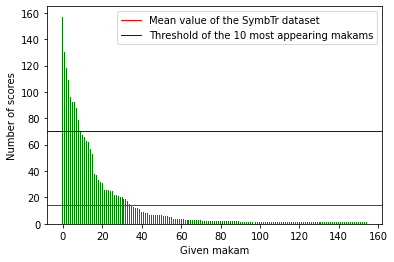

In [42]:
print(makams)
makam_unique = np.unique(makams)
print(len(makam_unique))

dico_makams = dict.fromkeys(makam_unique,0)

for j in makams:
  dico_makams[j] += 1

print(dico_makams)

# moyenne d'item par makam ?

moy = np.mean(list(dico_makams.values()))
print(f'Mean value : {np.mean(list(dico_makams.values()))} ; Variance : {np.var(list(dico_makams.values()))} ; Standard deviation : {np.std(list(dico_makams.values()))}')

# Histogramme 

plt.bar(np.arange(155), np.sort(list(dico_makams.values()))[::-1], width=0.5, color='g') 
plt.axhline(y=moy,linewidth=1, color='r',label = 'Mean value of the SymbTr dataset')
plt.axhline(y=70,linewidth=1, color='b',label = 'Threshold of the 10 most appearing makams')
plt.xlabel('')
plt.ylabel('Number of scores')
plt.xlabel('Given makam')
plt.legend()

 


In [43]:
import statistics

print(statistics.variance(list(dico_makams.values())))

768.6116464180981


In [44]:
# Savoir 
iter = 0
iter_j = 0
for key,val in dico_makams.items():
  if val > 14:
    iter += 1
    iter_j += val
    print(f'{key} has {val} items')

print(iter)
print(f'Number of items : {iter_j}')

acemasiran has 63 items
acemkurdi has 37 items
beyati has 62 items
buselik has 57 items
evic has 33 items
ferahfeza has 17 items
gerdaniye has 26 items
hicaz has 157 items
hicaz_humayun has 38 items
hicazkar has 79 items
hisarbuselik has 20 items
huseyni has 92 items
huzzam has 96 items
isfahan has 20 items
karcigar has 53 items
kurdilihicazkar has 70 items
mahur has 88 items
muhayyer has 67 items
muhayyerkurdi has 32 items
neva has 21 items
nihavent has 130 items
nikriz has 25 items
nisaburek has 26 items
rast has 109 items
saba has 66 items
sedaraban has 15 items
segah has 92 items
sehnaz has 25 items
sultaniyegah has 22 items
suzidil has 19 items
suzinak has 19 items
suzinak_zirgule has 26 items
tahir has 31 items
ussak has 118 items
yegah has 22 items
35
Number of items : 1873


In [45]:
# Recuperer le top 10

top_10 = list(dico_makams.values())
top_10 = np.sort(top_10)[-10:]
print(top_10)

list_top_10 = []
for key, val in dico_makams.items():
  if val in top_10:
    list_top_10.append(key)

list_top_10 = np.unique(list_top_10)
print(list_top_10)
print(len(list_top_10))

[ 70  79  88  92  92  96 109 118 130 157]
['hicaz' 'hicazkar' 'huseyni' 'huzzam' 'kurdilihicazkar' 'mahur'
 'nihavent' 'rast' 'segah' 'ussak']
10


# Dataset - 10 makams with the highest amount of scores

Taking the top 10 classes
Limiting at 70 elements for the dataset
dataset : csv file with intervalic histo for each elem 
  intervalic histo : must be % of all recognised intervalic.

In [46]:
classes = ['hicaz', 'hicazkar', 'huseyni', 'huzzam', 'kurdilihicazkar', 'mahur', 'nihavent', 'rast', 'segah', 'ussak']

dico_top_10 = {'hicaz' : [], 'hicazkar' : [], 'huseyni' : [], 'huzzam' : [], 'kurdilihicazkar' : [], 'mahur' : [] ,'nihavent' : [], 'rast' : [], 'segah' : [], 'ussak' : []}

# Dictionary ; Key : class // Value : List de toutes les lines ; ça pick random dans la list
with open('/content/raw_histograms.csv') as fp:
    csvreader = csv.reader(fp)
    for line in csvreader:
        #print(line)
        #print(line[13])

        if line[13] in classes:
          dico_top_10[line[13]].append(line)


print(dico_top_10)
print(len(dico_top_10['hicaz']))  # 157 elem as planned
        

{'hicaz': [['0.0', '0.0', '0.31004366812227074', '0.0', '0.08296943231441048', '0.11790393013100436', '0.27074235807860264', '0.039301310043668124', '0.05240174672489083', '0.013100436681222707', '0.07423580786026202', '0.0', '0.039301310043668124', 'hicaz'], ['0.0', '0.07120743034055728', '0.1609907120743034', '0.03715170278637771', '0.23219814241486067', '0.04953560371517028', '0.15170278637770898', '0.01238390092879257', '0.1238390092879257', '0.034055727554179564', '0.11145510835913312', '0.0', '0.015479876160990712', 'hicaz'], ['0.005763688760806916', '0.043227665706051875', '0.19020172910662825', '0.005763688760806916', '0.1642651296829971', '0.07492795389048991', '0.2017291066282421', '0.020172910662824207', '0.11815561959654179', '0.02881844380403458', '0.12968299711815562', '0.011527377521613832', '0.005763688760806916', 'hicaz'], ['0.015228426395939087', '0.05583756345177665', '0.1218274111675127', '0.02030456852791878', '0.17258883248730963', '0.03553299492385787', '0.261421

In [47]:
for j in dico_top_10.keys():
  print(f'For this makam : {j}, we have {len(dico_top_10[j])} elements')

For this makam : hicaz, we have 157 elements
For this makam : hicazkar, we have 79 elements
For this makam : huseyni, we have 92 elements
For this makam : huzzam, we have 96 elements
For this makam : kurdilihicazkar, we have 70 elements
For this makam : mahur, we have 88 elements
For this makam : nihavent, we have 130 elements
For this makam : rast, we have 109 elements
For this makam : segah, we have 92 elements
For this makam : ussak, we have 118 elements


In [48]:
import random
dico_top_10_balanced = {'hicaz' : [], 'hicazkar' : [], 'huseyni' : [], 'huzzam' : [], 'kurdilihicazkar' : [], 'mahur' : [] ,'nihavent' : [], 'rast' : [], 'segah' : [], 'ussak' : []}

for j in dico_top_10.keys():
  #print(dico_top_10.get(j))
  dico_top_10_balanced[j] = random.sample(dico_top_10.get(j),70)

for j in dico_top_10_balanced.keys():
  print(f'For this makam : {j}, we have {len(dico_top_10_balanced[j])} elements')

For this makam : hicaz, we have 70 elements
For this makam : hicazkar, we have 70 elements
For this makam : huseyni, we have 70 elements
For this makam : huzzam, we have 70 elements
For this makam : kurdilihicazkar, we have 70 elements
For this makam : mahur, we have 70 elements
For this makam : nihavent, we have 70 elements
For this makam : rast, we have 70 elements
For this makam : segah, we have 70 elements
For this makam : ussak, we have 70 elements


In [49]:
# Making a csv file of those elements -> our dataset

dico_histo_void = {'-13': 0, '-12': 0, '-9': 0, '-8': 0, '-5': 0, '-4': 0, '0': 0, '4': 0, '5': 0, '8': 0, '9': 0, '13': 0, '22': 0}
list_col = list(dico_histo_void.keys())
list_col.append('makam')
iter = 0

with open('/content/histograms_dataset.csv', 'w') as fp:
    writer = csv.writer(fp)
    writer.writerow(list_col)
    for key in dico_top_10_balanced.keys():
      for val in dico_top_10_balanced[key]:
        #print(val)
        writer.writerow(val)
        iter += 1

print(f'Number of data processed : {iter} - should be 700')

Number of data processed : 700 - should be 700


In [50]:
!wc -l /content/histograms_dataset.csv

701 /content/histograms_dataset.csv


In [51]:
!head /content/histograms_dataset.csv

-13,-12,-9,-8,-5,-4,0,4,5,8,9,13,22,makam
0.023255813953488372,0.0,0.27906976744186046,0.0,0.13953488372093023,0.09302325581395349,0.18604651162790697,0.046511627906976744,0.046511627906976744,0.0,0.16279069767441862,0.023255813953488372,0.0,hicaz
0.0055248618784530384,0.03591160220994475,0.15469613259668508,0.052486187845303865,0.15193370165745856,0.058011049723756904,0.15469613259668508,0.03038674033149171,0.1298342541436464,0.055248618784530384,0.1464088397790055,0.013812154696132596,0.011049723756906077,hicaz
0.022222222222222223,0.08333333333333333,0.2111111111111111,0.0,0.17222222222222222,0.07777777777777778,0.05555555555555555,0.03333333333333333,0.13333333333333333,0.0,0.1388888888888889,0.0,0.07222222222222222,hicaz
0.03834355828220859,0.07668711656441718,0.147239263803681,0.032208588957055216,0.22392638036809817,0.03987730061349693,0.15337423312883436,0.003067484662576687,0.1411042944785276,0.013803680981595092,0.07208588957055215,0.04754601226993865,0.010736196319018405,hic

# Classification

In [52]:
!pip install lazypredict
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=4a1136e7a076825e53bfbad3a52dba47ed10517e02e5a296cf30b88a7b1d2172
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=2388afae69bf39866d5fc98cc49d5f39d2f301f3f8a40f217a338e9c973705e9
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn

In [53]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns

# Importing from sklearn for the SVM and the KNN classifications : 
from sklearn import preprocessing
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Standard scaling (z-scoring) and label encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix # For reporting accuracy
from sklearn.neighbors import KNeighborsClassifier # We will use a KNN after learning the distance metric
from sklearn.pipeline import make_pipeline

# We will use Keras for the sequential model
from keras.models import Sequential
from keras import layers

### How to visualize features using metric learning https://github.com/bmcfee/ismir2020-metric-learning
# scikit-learn provides Linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Finally, umap will let us map high-dimensional data down to 2-d for plotting
import umap

In [54]:
data = pd.read_csv('/content/histograms_dataset.csv')
print(f'Our data matrix has this size : {data.shape} ; {data.shape[0]} extracts of {data.shape[1]} features.')
data.head()

Our data matrix has this size : (700, 14) ; 700 extracts of 14 features.


,-13,-12,-9,-8,-5,-4,0,4,5,8,9,13,22,makam
0,0.02,0.00,0.28,0.00,0.14,0.09,0.19,0.05,0.05,0.00,0.16,0.02,0.00,hicaz
1,0.01,0.04,0.15,0.05,0.15,0.06,0.15,0.03,0.13,0.06,0.15,0.01,0.01,hicaz
2,0.02,0.08,0.21,0.00,0.17,0.08,0.06,0.03,0.13,0.00,0.14,0.00,0.07,hicaz
3,0.04,0.08,0.15,0.03,0.22,0.04,0.15,0.00,0.14,0.01,0.07,0.05,0.01,hicaz
4,0.01,0.04,0.19,0.01,0.16,0.07,0.20,0.02,0.12,0.03,0.13,0.01,0.01,hicaz


In [55]:
data = pd.read_csv('/content/histograms_dataset.csv')
data.columns

Index(['-13', '-12', '-9', '-8', '-5', '-4', '0', '4', '5', '8', '9', '13',
       '22', 'makam'],
      dtype='object')

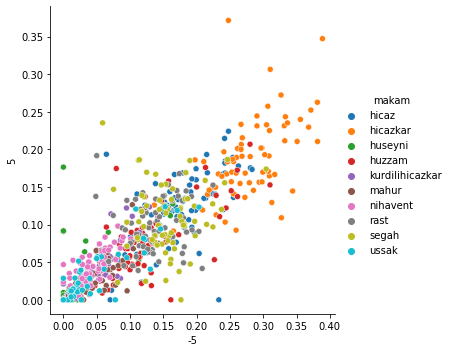

In [56]:
# Take two random features and plot the sample points
sns.relplot(x = "-5", y = "5", hue = "makam", data = data);

## LazyPredict

In [57]:
X_histo = []
y_histo = []

makam_to_class = {'hicaz':0, 'hicazkar':1, 'huseyni':2, 'huzzam':3, 'kurdilihicazkar':4, 'mahur':5, 'nihavent':6, 'rast':7, 'segah':8, 'ussak':9}

with open('/content/histograms_dataset.csv') as fp:
    csvreader = csv.reader(fp)
    for line in csvreader:
      if line[0] != '-13':
        y_histo.append(makam_to_class[line[13]])
        X_histo.append(line[:13])

X_histo = np.array(X_histo).astype(float)
X_histo = np.round(X_histo, decimals=5)
y_histo = np.array(y_histo)



In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_histo, y_histo,test_size=.33,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:10<00:00,  2.68it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.64,0.64,None,0.64,0.15
NuSVC,0.63,0.64,None,0.62,0.06
LogisticRegression,0.63,0.64,None,0.63,0.06
RandomForestClassifier,0.62,0.63,None,0.61,0.28
ExtraTreesClassifier,0.61,0.63,None,0.61,0.20
SVC,0.61,0.62,None,0.60,0.04
LinearDiscriminantAnalysis,0.61,0.62,None,0.61,0.04
CalibratedClassifierCV,0.61,0.62,None,0.60,0.64
GaussianNB,0.61,0.61,None,0.59,0.02


## SVM

accuracy:  0.5714285714285714


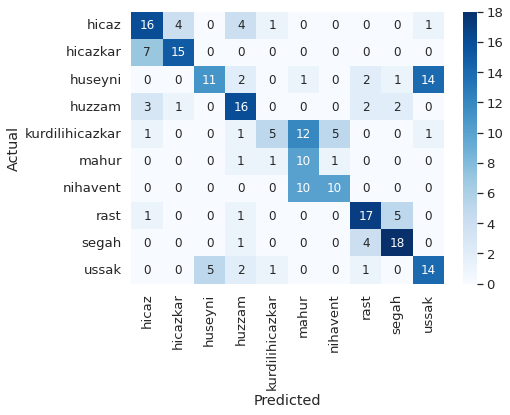

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_histo, y_histo,test_size=.33,random_state =123)
clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))

# Fit model with training data
clf.fit(X_train, y_train)

# Predict classes of test samples
y_pred = clf.predict(X_test)

# The data is balanced, so we can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

classes = list(makam_to_class.keys())
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

## NN

In [60]:
# Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_histo, y_histo, test_size = 0.33, random_state = 1)

# ..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (469, 10)
One-hot encoded y_test shape =  (231, 10)


In [61]:
# Defining the model 

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 12)) #40
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.20))
    
    # 2. hidden layer
    model.add(layers.Dense(name='HiddenLayer_2', units = 11)) #20
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.20))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 10))
    model.add(layers.Activation('sigmoid'))
    
    return model

model = compose_model(X_train_val.shape[1])

In [62]:
model.summary()  # Plot summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (BatchNormalizat  (None, 13)               52        
 ion)                                                            
                                                                 
 HiddenLayer_1 (Dense)       (None, 12)                168       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 12)                0         
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 HiddenLayer_2 (Dense)       (None, 11)                1

In [63]:
# Training the model

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 64, epochs = 250, validation_split=0.2, verbose=0)

In [64]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1776098906993866
Test accuracy: 0.5714285969734192


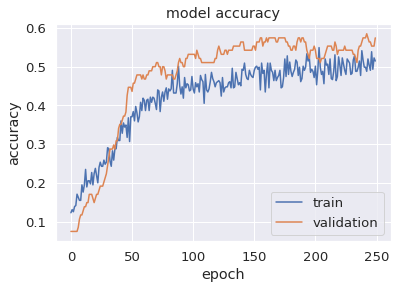

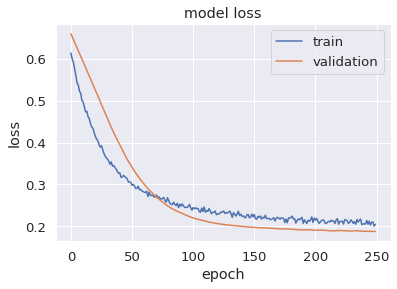

In [65]:
# summarize history for accuracy
plt.plot(summary.history['accuracy'])
plt.plot(summary.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## KNN & LDA

k = 1 : 84%
k = 2 : 73%
k = 3 : 67%
k = 5 : 64%
k = 10 : 66%
k = 25 : 66%

In [81]:
# scaling followed by KNN in a pipeline process
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2))

# Fit all stages of the pipeline to our training data
clf.fit(X_train, y=y_train)

# How well does our 1-Nearest neighbor model work?
y_pred = clf.predict(X_test)

# testing, the model. Because the data is balanced, we can use accuracy as a measure
y_test == y_pred
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.7316017316017316


                 precision    recall  f1-score   support

          hicaz       0.85      0.76      0.80        29
       hicazkar       0.89      0.89      0.89        27
        huseyni       0.87      0.72      0.79        18
         huzzam       0.84      0.94      0.89        17
kurdilihicazkar       0.90      0.86      0.88        22
          mahur       0.79      0.96      0.86        23
       nihavent       1.00      0.92      0.96        25
           rast       0.87      0.87      0.87        23
          segah       0.88      0.85      0.86        26
          ussak       0.75      0.86      0.80        21

       accuracy                           0.86       231
      macro avg       0.86      0.86      0.86       231
   weighted avg       0.87      0.86      0.86       231



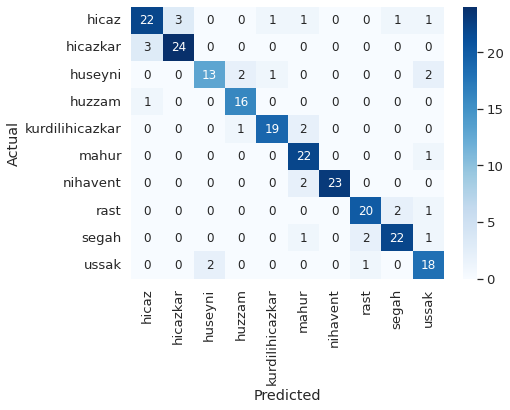

In [67]:
# Compare the predictions to the true labels in y_test
classes = list(makam_to_class.keys())
report = classification_report(y_test, y_pred, target_names=classes)

print(report)

# Finally, plot a confusion matrix showing how mistakes are distributed
#plot_confusion_matrix(clf, X_test, y_test, display_labels=classes, xticks_rotation='vertical', normalize='true');

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

In [68]:
reducer = umap.UMAP(random_state=42)

# We'll apply all but the last stage (KNN classifier) of our pipeline to the data.
# In this case, we just have one previous stage, which does feature normalization.
# This will change in subsequent examples.

X_train_transformed = clf[:-1].transform(X_train)
X_test_transformed = clf[:-1].transform(X_test)

# Fit on the transformed data, and then transform the test data
embed = reducer.fit_transform(X_train_transformed)
embed_test = reducer.transform(X_test_transformed)

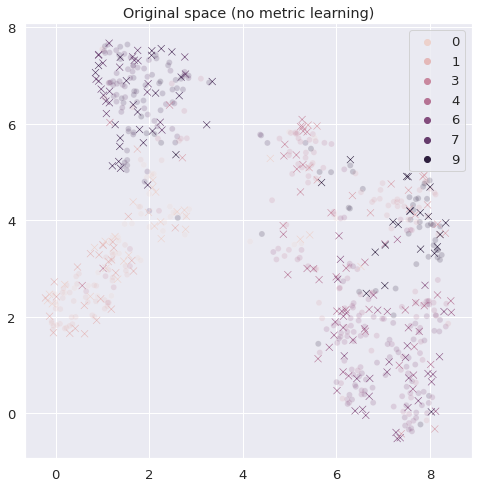

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=embed[:, 0], y=embed[:, 1], hue=y_train, marker='o', alpha=0.2, legend=None, ax=ax)
sns.scatterplot(x=embed_test[:, 0], y=embed_test[:, 1], hue=y_test, marker='x', s=50, alpha=1, legend='brief', ax=ax)
ax.legend(bbox_to_anchor=(1, 1));
ax.set(title='Original space (no metric learning)');

k = 1 : 0.87
k = 2 : 0.74
k = 3 : 0.71
k = 5 : 0.72
k = 10 : 0.68
k = 25 : 0.70

[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 3) Processing lineardiscriminantanalysis, total=   0.0s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=   0.0s
                 precision    recall  f1-score   support

          hicaz       0.85      0.79      0.82        29
       hicazkar       0.96      0.93      0.94        27
        huseyni       0.86      0.67      0.75        18
         huzzam       0.79      0.88      0.83        17
kurdilihicazkar       0.83      0.91      0.87        22
          mahur       0.81      0.96      0.88        23
       nihavent       1.00      0.92      0.96        25
           rast       0.86      0.83      0.84        23
          segah       0.88      0.88      0.88        26
          ussak       0.83      0.90      0.86        21

       accuracy                           0.87       231
      macro avg       0.87      0.87      0.86       231
   weighted avg       0.87      0.

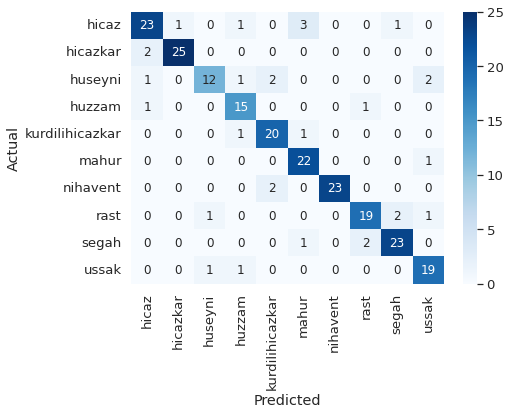

In [82]:
# scaling followed by KNN in a pipeline process

clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(), KNeighborsClassifier(n_neighbors=1), verbose=True)
clf.fit(X_train, y=y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=classes)

print(report)

#plot_confusion_matrix(clf, X_test, y_test, display_labels=classes, xticks_rotation='vertical', normalize='true')

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

In [83]:
reducer = umap.UMAP(random_state=42)

# We'll fit the umap embedding on the data after applying our learned transformation
embed = reducer.fit_transform(clf[:-1].transform(X_train))
embed_test = reducer.transform(clf[:-1].transform(X_test))

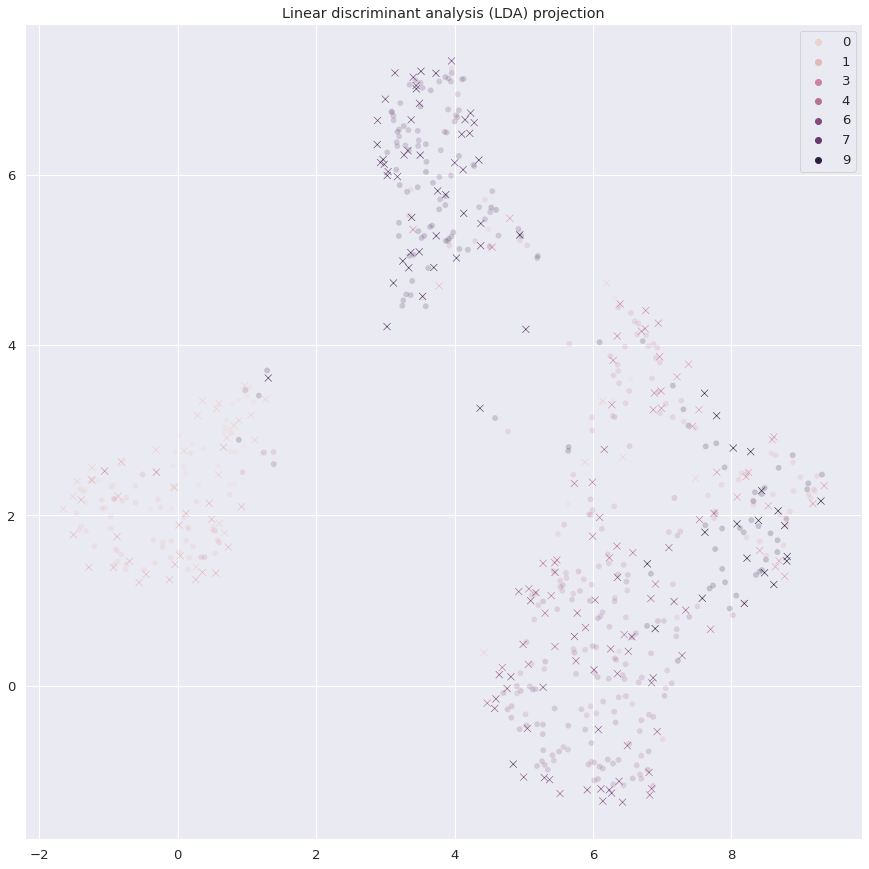

In [84]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(x=embed[:, 0], y=embed[:, 1], hue=y_train, marker='o', alpha=0.2, legend=None, ax=ax)
sns.scatterplot(x=embed_test[:, 0], y=embed_test[:, 1], hue=y_test, marker='x', s=50, alpha=1, legend='brief', ax=ax)
ax.legend(bbox_to_anchor=(1, 1));
ax.set(title='Linear discriminant analysis (LDA) projection');

In [93]:
classes_val = ['hicaz', 'hicazkar', 'huseyni', 'huzzam', 'kurdilihicazkar', 'mahur',
 'nihavent', 'rast', 'segah', 'ussak']
interv_val = ['-13', '-12', '-9', '-8', '-5', '-4', '0', '4', '5', '8', '9', '13', '22']
  

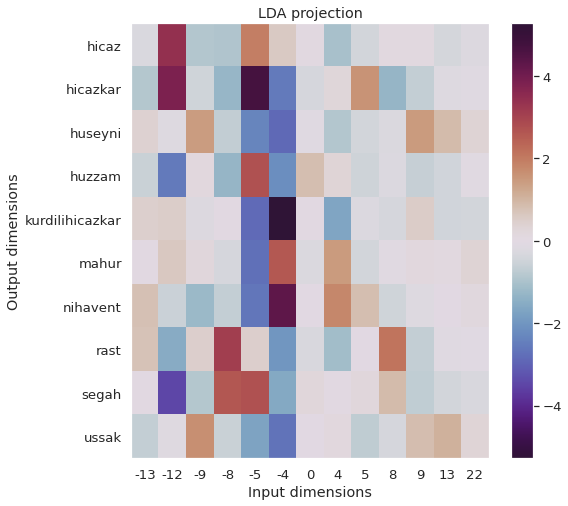

In [97]:
fig, ax = plt.subplots(figsize=(8, 8))
model = clf.steps[1][1]
weights = model.coef_

img = ax.imshow(weights, cmap='twilight_shifted', vmin=-np.abs(weights).max(), vmax=np.abs(weights).max(), aspect='auto', interpolation='none')
fig.colorbar(img, ax=ax)
ax.set_xticks(np.arange(0, len(interv_val), 1))
ax.set_yticks(np.arange(0, len(classes_val), 1))
ax.set_xticklabels(interv_val)
ax.set_yticklabels(classes_val)
ax.grid(False)
ax.set(xlabel='Input dimensions', ylabel='Output dimensions', title='LDA projection');

In [88]:
# We print the most important weights for each class (for LDA method)

for i in range(len(weights)):
  print(f'For class n°{i+1}')
  print(data.columns[:13][weights[i]>1])
  print('---')

For class n°1
Index(['-12', '-5'], dtype='object')
---
For class n°2
Index(['-12', '-5', '5'], dtype='object')
---
For class n°3
Index(['-9', '9'], dtype='object')
---
For class n°4
Index(['-5'], dtype='object')
---
For class n°5
Index(['-4'], dtype='object')
---
For class n°6
Index(['-4', '4'], dtype='object')
---
For class n°7
Index(['-4', '4'], dtype='object')
---
For class n°8
Index(['-8', '8'], dtype='object')
---
For class n°9
Index(['-8', '-5'], dtype='object')
---
For class n°10
Index(['-9', '13'], dtype='object')
---
